In [302]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [303]:
df1 = pd.read_excel(r'C:\Users\pavan.vasa\OneDrive - Accenture\My Learning\Target MACHINE LEARNING 6 Months\Machine Learning Projects\Hopspital Readmission Project\cvd_readmission.xlsx')

In [304]:
df1.head()

,patient_id,age,gender,diabetes,hypertension,prior_readmissions,length_of_stay,discharge_disposition,heart_failure,coronary_artery_disease,myocardial_infarction,stroke,peripheral_arterial_disease,readmitted
0,45,72,Female,1,0,0,14,Home,0,0,1,1,1,1
1,2,45,Male,0,0,2,5,Home,0,0,0,0,0,0
2,3,65,Female,0,1,2,3,Home,1,1,0,1,1,0
3,54,49,Male,1,0,0,11,Home,1,1,1,1,1,1
4,5,66,Female,0,1,2,5,Home,0,0,0,1,1,0


In [305]:
df1.groupby('gender')['gender'].count()


gender
Female    510
Male      489
Name: gender, dtype: int64

In [306]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   patient_id                   999 non-null    int64 
 1   age                          999 non-null    int64 
 2   gender                       999 non-null    object
 3   diabetes                     999 non-null    int64 
 4   hypertension                 999 non-null    int64 
 5   prior_readmissions           999 non-null    int64 
 6   length_of_stay               999 non-null    int64 
 7   discharge_disposition        999 non-null    object
 8   heart_failure                999 non-null    int64 
 9   coronary_artery_disease      999 non-null    int64 
 10  myocardial_infarction        999 non-null    int64 
 11  stroke                       999 non-null    int64 
 12  peripheral_arterial_disease  999 non-null    int64 
 13  readmitted                   999 no

Creating Dummies

In [308]:
df_dummies = pd.get_dummies(df[['gender', 'discharge_disposition']])
df_dummies

,gender_Female,gender_Male,discharge_disposition_Home,discharge_disposition_Rehab,discharge_disposition_Skilled Nursing Facility
0,True,False,True,False,False
1,False,True,True,False,False
2,True,False,True,False,False
3,False,True,True,False,False
4,True,False,True,False,False
...,...,...,...,...,...
994,False,True,False,False,True
995,True,False,True,False,False
996,False,True,True,False,False
997,True,False,True,False,False


In [309]:
df2 = pd.concat([df1, df_dummies], axis = 'columns')
df2.head()

,patient_id,age,gender,diabetes,hypertension,prior_readmissions,length_of_stay,discharge_disposition,heart_failure,coronary_artery_disease,myocardial_infarction,stroke,peripheral_arterial_disease,readmitted,gender_Female,gender_Male,discharge_disposition_Home,discharge_disposition_Rehab,discharge_disposition_Skilled Nursing Facility
0,45,72,Female,1,0,0,14,Home,0,0,1,1,1,1,True,False,True,False,False
1,2,45,Male,0,0,2,5,Home,0,0,0,0,0,0,False,True,True,False,False
2,3,65,Female,0,1,2,3,Home,1,1,0,1,1,0,True,False,True,False,False
3,54,49,Male,1,0,0,11,Home,1,1,1,1,1,1,False,True,True,False,False
4,5,66,Female,0,1,2,5,Home,0,0,0,1,1,0,True,False,True,False,False


In [310]:
df3 = df2.drop(['patient_id','gender', 'discharge_disposition', 'discharge_disposition_Skilled Nursing Facility','gender_Male' ], axis = 'columns')
df3.columns

Index(['age', 'diabetes', 'hypertension', 'prior_readmissions',
       'length_of_stay', 'heart_failure', 'coronary_artery_disease',
       'myocardial_infarction', 'stroke', 'peripheral_arterial_disease',
       'readmitted', 'gender_Female', 'discharge_disposition_Home',
       'discharge_disposition_Rehab'],
      dtype='object')

In [311]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          999 non-null    int64
 1   diabetes                     999 non-null    int64
 2   hypertension                 999 non-null    int64
 3   prior_readmissions           999 non-null    int64
 4   length_of_stay               999 non-null    int64
 5   heart_failure                999 non-null    int64
 6   coronary_artery_disease      999 non-null    int64
 7   myocardial_infarction        999 non-null    int64
 8   stroke                       999 non-null    int64
 9   peripheral_arterial_disease  999 non-null    int64
 10  readmitted                   999 non-null    int64
 11  gender_Female                999 non-null    bool 
 12  discharge_disposition_Home   999 non-null    bool 
 13  discharge_disposition_Rehab  999 non-null    bool 

In [312]:
target = final['readmitted']

In [313]:
target.shape

(999,)

In [314]:
df4 = df3.drop(['readmitted'], axis = 'columns')
df4.shape

(999, 13)

In [315]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [316]:
from sklearn.model_selection import train_test_split

In [317]:
X_train, X_test, y_train, y_test = train_test_split(df4, target, test_size=0.2, random_state=42)

In [318]:
X_train.head()

,age,diabetes,hypertension,prior_readmissions,length_of_stay,heart_failure,coronary_artery_disease,myocardial_infarction,stroke,peripheral_arterial_disease,gender_Female,discharge_disposition_Home,discharge_disposition_Rehab
778,53,1,1,4,4,0,1,1,0,0,True,False,False
286,70,1,0,2,13,0,0,1,0,1,False,True,False
165,88,0,0,2,6,1,0,0,1,1,False,False,True
960,84,0,1,2,11,1,1,0,1,1,False,True,False
493,80,0,0,1,6,0,1,1,1,0,False,True,False


In [319]:
y_train.head()

778    0
286    0
165    1
960    1
493    0
Name: readmitted, dtype: int64

In [320]:
model.fit(X_train, y_train)

C:\Users\pavan.vasa\AppData\Local\Anaconda3.1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [321]:
model.score(X_test, y_test)

0.725

In [322]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [323]:
#Logistic Regression
l_scores = cross_val_score(LogisticRegression(), df4, target)
print(l_scores)
print(np.average(l_scores))

C:\Users\pavan.vasa\AppData\Local\Anaconda3.1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pavan.vasa\AppData\Local\Anaconda3.1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

[0.63       0.78       0.72       0.775      0.78894472]
0.738788944723618


C:\Users\pavan.vasa\AppData\Local\Anaconda3.1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [324]:
#Decision Tree
d_scores = cross_val_score(DecisionTreeClassifier(), df4, target, cv = 5)
print(d_scores)
print(np.mean(d_scores))

[0.56      0.66      0.66      0.625     0.6281407]
0.6266281407035177


In [325]:
#Support Vector Machine
s_scores = cross_val_score(SVC(), df4, target)
print(s_scores)
print(np.mean(s_scores))

[0.635      0.635      0.635      0.635      0.63819095]
0.6356381909547739


In [326]:
#Random Forest
r_scores = cross_val_score(RandomForestClassifier(n_estimators = 50), df4, target)
print(r_scores)
print(np.mean(r_scores))

[0.635      0.765      0.755      0.745      0.76884422]
0.7337688442211056


In [327]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=9)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=9)

In [328]:
model.score(X_test, y_test)

0.72

In [329]:
n = 50
s = 1
li= []
for i in range(0, n):
    model = RandomForestClassifier(n_estimators=s)
    model.fit(X_train, y_train)
    li.append(model.score(X_test,y_test))
    s = s + 1

print(li)
    

[0.63, 0.67, 0.7, 0.685, 0.67, 0.69, 0.7, 0.715, 0.725, 0.7, 0.71, 0.72, 0.7, 0.665, 0.745, 0.74, 0.71, 0.72, 0.73, 0.7, 0.73, 0.73, 0.705, 0.735, 0.76, 0.74, 0.715, 0.735, 0.755, 0.755, 0.72, 0.73, 0.75, 0.72, 0.74, 0.715, 0.71, 0.715, 0.74, 0.73, 0.74, 0.735, 0.725, 0.74, 0.73, 0.71, 0.73, 0.74, 0.745, 0.7]


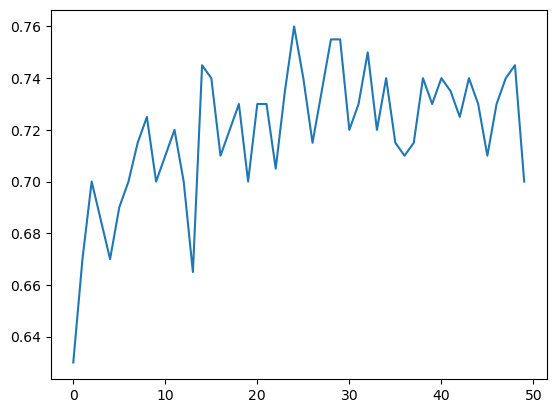

In [330]:
import matplotlib.pyplot as plt
plt.plot(li)

In [331]:
#Maximum Score Achieved
ma_x = max(li)
inde_x = li.index(max(li))+1
print(max(li))
print(inde_x)

0.76
25


In [332]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.745

In [376]:
#Prediction of Hospital Readmission on Test Samples
predict = model.predict(X_train)

In [382]:
y_train_pred_series = pd.Series(model.predict(X_train), index=X_train.index, name='predictions')
final_prediction = pd.concat([X_train, y_train_pred_series], axis=1)
final_prediction.head()

,age,diabetes,hypertension,prior_readmissions,length_of_stay,heart_failure,coronary_artery_disease,myocardial_infarction,stroke,peripheral_arterial_disease,gender_Female,discharge_disposition_Home,discharge_disposition_Rehab,predictions
778,53,1,1,4,4,0,1,1,0,0,True,False,False,0
286,70,1,0,2,13,0,0,1,0,1,False,True,False,0
165,88,0,0,2,6,1,0,0,1,1,False,False,True,1
960,84,0,1,2,11,1,1,0,1,1,False,True,False,1
493,80,0,0,1,6,0,1,1,1,0,False,True,False,0
